In [1]:
import numpy as np
import pandas as pd
import sklearn.impute , sklearn.preprocessing
import seaborn 
import matplotlib.pyplot as plt


In [2]:
data_train = pd.read_csv('./data/high_salary_train.csv').set_index('id')
data_train

social-security-number  house-number  age-group         workclass  \
id                                                                         
26890             987463818.0        5066.0        3.0         state-gov   
933               884327274.0        6423.0        3.0           private   
25596             397372044.0        9074.0        2.0           private   
12949             580119132.0         413.0        2.0           private   
6681              836161922.0        1790.0        1.0           private   
...                       ...           ...        ...               ...   
8695              181655516.0         361.0        0.0           private   
2192              796404433.0         950.0        2.0         local-gov   
8250              622635909.0        8689.0        0.0           private   
18511             338364928.0        5238.0        2.0           private   
16074             657404344.0        8745.0        2.0  self-emp-not-inc   

         fnlwgt     education  education-num      marital-status  \
id                                                                 
26890  327886.0     doctorate           16.0            divorced   
933     99736.0       masters           14.0            divorced   
25596  398575.0  some-college           10.0       never-married   
12949  682947.0     bachelors           13.0            divorced   
6681   236861.0       hs-grad            9.0  married-civ-spouse   
...         ...           ...            ...                 ...   
8695    42706.0  some-college           10.0       never-married   
2192   103759.0  some-college           10.0  married-civ-spouse   
8250   316184.0       hs-grad            9.0       never-married   
18511  481987.0       masters           14.0  married-civ-spouse   
16074   75065.0          12th            8.0  married-civ-spouse   

              occupation    relationship                race     sex  \
id                                                                     
26890     prof-specialty       own-child               white    male   
933       prof-specialty       unmarried               white    male   
25596       tech-support       unmarried               white  female   
12949    exec-managerial   not-in-family               white    male   
6681   machine-op-inspct         husband               white    male   
...                  ...             ...                 ...     ...   
8695      prof-specialty   not-in-family               white    male   
2192    transport-moving         husband               white    male   
8250       other-service  other-relative               black    male   
18511       tech-support         husband               white    male   
16074    exec-managerial         husband  asian-pac-islander    male   

       capitalgain  capitalloss  hoursperweek native-country-code  \
id                                                                  
26890          0.0          0.0           3.0                 USA   
933            4.0          0.0           3.0                 USA   
25596          0.0          0.0           2.0                 USA   
12949          0.0          0.0           3.0                 USA   
6681           0.0          0.0           2.0                 USA   
...            ...          ...           ...                 ...   
8695           0.0          0.0           2.0                 USA   
2192           2.0          0.0           2.0                 USA   
8250           0.0          0.0           2.0                 USA   
18511          0.0          0.0           0.0                 USA   
16074          0.0          0.0           3.0                 VNM   

      native-country  label  
id                           
26890  united-states    1.0  
933    united-states    1.0  
25596  united-states    0.0  
12949  united-states    1.0  
6681   united-states    0.0  
...              ...    ...  
8695   united-states    0.0  
2192   united-states    0.0 

In [3]:
data_test = pd.read_csv('./data/high_salary_test.csv').set_index('id')
data_test

social-security-number  house-number  age-group workclass    fnlwgt  \
id                                                                           
12849             335086368.0        4170.0        1.0   private  509500.0   
1460              732733728.0        5442.0        0.0   private  243368.0   
13594             807579036.0        7659.0        2.0   private  144524.0   
14400             201637967.0        4318.0        3.0   private  150975.0   
14333             758267678.0        8392.0        2.0   private  136419.0   
...                       ...           ...        ...       ...       ...   
21121             793510081.0        3995.0        3.0   private   48358.0   
12348             922922461.0        9297.0        2.0   private  163215.0   
22298             455309825.0        8674.0        3.0   private  196328.0   
15636             382989583.0        2765.0        1.0   private  225231.0   
5497              452206005.0        9558.0        0.0   private  308205.0   

          education  education-num      marital-status         occupation  \
id                                                                          
12849     bachelors           13.0       never-married       tech-support   
1460      preschool            1.0       never-married    farming-fishing   
13594       hs-grad            9.0            divorced  machine-op-inspct   
14400       hs-grad            9.0            divorced  machine-op-inspct   
14333       hs-grad            9.0  married-civ-spouse       craft-repair   
...             ...            ...                 ...                ...   
21121       hs-grad            9.0  married-civ-spouse       craft-repair   
12348     bachelors           13.0            divorced    exec-managerial   
22298     bachelors           13.0  married-civ-spouse    exec-managerial   
15636  some-college           10.0            divorced    exec-managerial   
5497   some-college           10.0       never-married    exec-managerial   

        relationship                race     sex  capitalgain  capitalloss  \
id                                                                           
12849  not-in-family               white  female          2.0          0.0   
1460   not-in-family               white    male          0.0          0.0   
13594      unmarried               black  female          0.0          0.0   
14400  not-in-family  amer-indian-eskimo  female          NaN          0.0   
14333        husband               white    male          0.0          0.0   
...              ...                 ...     ...          ...          ...   
21121        husband               white    male          0.0          0.0   
12348  not-in-family               white  female          4.0          0.0   
22298        husband               black    male          0.0          0.0   
15636  not-in-family               white    male          3.0          0.0   
5497       own-child                 NaN    male          0.0          0.0   

       hoursperweek native-country-code native-country  label  
id                                                             
12849           2.0                 USA  united-states    1.0  
1460            3.0                 MEX         mexico    0.0  
13594           2.0                 USA  united-states    0.0  
14400           2.0                 USA  united-states    0.0  
14333           3.0                 USA  united-states    1.0  
...             ...                 ...            ...    ...  
21121           2.0                 USA  united-states    1.0  
12348           2.0                 USA  united-states    1.0  
22298           2.0                 USA  united-states    0.0  
15636           3.0                 USA  united-states    1.0  
5497            2.0                 USA  united-states    0.0  

[4180 rows x 18 columns]

In [4]:
data_live = pd.read_csv('./data/high_salary.live.csv').set_index('id')
data_live

social-security-number  house-number  age-group  workclass    fnlwgt  \
id                                                                            
6111              565712576.0        9337.0        0.0    private  287357.0   
11214             329599477.0        6457.0        1.0    private  167558.0   
5554              222432362.0         189.0        4.0    private   27385.0   
25131             209882990.0        2048.0        2.0  local-gov  153976.0   
14324             936607310.0        8185.0        3.0    private   20956.0   
...                       ...           ...        ...        ...       ...   
25998             331613078.0        6349.0        4.0    private  117898.0   
8375              353499588.0        5768.0        4.0    private  298546.0   
13888             604365500.0        6286.0        1.0    private   36340.0   
4159              258361593.0        5369.0        1.0    private  173473.0   
9658              987175237.0         212.0        0.0        NaN  199426.0   

          education  education-num      marital-status       occupation  \
id                                                                        
6111           11th            7.0  married-civ-spouse  protective-serv   
11214       hs-grad            9.0       never-married            sales   
5554        hs-grad            9.0  married-civ-spouse  exec-managerial   
25131       masters           14.0  married-civ-spouse   prof-specialty   
14324       hs-grad            9.0  married-civ-spouse     craft-repair   
...             ...            ...                 ...              ...   
25998     bachelors           13.0  married-civ-spouse  exec-managerial   
8375        hs-grad            9.0  married-civ-spouse  farming-fishing   
13888          11th            7.0            divorced    other-service   
4159        masters           14.0  married-civ-spouse   prof-specialty   
9658   some-college           10.0       never-married              NaN   

        relationship                race     sex  capitalgain  capitalloss  \
id                                                                           
6111         husband               white    male          0.0          0.0   
11214      unmarried               white  female          0.0          0.0   
5554         husband               white    male          0.0          0.0   
25131        husband               white    male          0.0          0.0   
14324        husband               white    male          0.0          0.0   
...              ...                 ...     ...          ...          ...   
25998        husband               white    male          0.0          0.0   
8375         husband               white    male          0.0          0.0   
13888      unmarried               white  female          0.0          0.0   
4159         husband  asian-pac-islander    male          0.0          0.0   
9658   not-in-family               white  female          0.0          0.0   

       hoursperweek native-country-code native-country  
id                                                      
6111            2.0                 USA  united-states  
11214           1.0                 MEX         mexico  
5554            3.0                 USA  united-states  
25131           2.0                 USA  united-states  
14324           2.0                 USA  united-states  
...             ...                 ...            ...  
25998           3.0                 USA  united-states  
8375            4.0                 USA  united-states  
13888           1.0                 USA  united-states  
4159            2.0                 USA  united-states  
9658            2.0                 USA  united-states  

[6967 rows x 17 columns]

In [5]:
# Check Missing Value

In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16720 entries, 26890 to 16074
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   social-security-number  16708 non-null  float64
 1   house-number            16700 non-null  float64
 2   age-group               16713 non-null  float64
 3   workclass               15873 non-null  object 
 4   fnlwgt                  16703 non-null  float64
 5   education               16704 non-null  object 
 6   education-num           16708 non-null  float64
 7   marital-status          16699 non-null  object 
 8   occupation              15875 non-null  object 
 9   relationship            16705 non-null  object 
 10  race                    16706 non-null  object 
 11  sex                     16705 non-null  object 
 12  capitalgain             16700 non-null  float64
 13  capitalloss             16706 non-null  float64
 14  hoursperweek            16701 non-null 

In [7]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4180 entries, 12849 to 5497
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   social-security-number  4178 non-null   float64
 1   house-number            4173 non-null   float64
 2   age-group               4174 non-null   float64
 3   workclass               3970 non-null   object 
 4   fnlwgt                  4174 non-null   float64
 5   education               4176 non-null   object 
 6   education-num           4178 non-null   float64
 7   marital-status          4178 non-null   object 
 8   occupation              3971 non-null   object 
 9   relationship            4174 non-null   object 
 10  race                    4172 non-null   object 
 11  sex                     4173 non-null   object 
 12  capitalgain             4177 non-null   float64
 13  capitalloss             4173 non-null   float64
 14  hoursperweek            4178 non-null   f

In [8]:
data_live.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6967 entries, 6111 to 9658
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   social-security-number  6965 non-null   float64
 1   house-number            6958 non-null   float64
 2   age-group               6954 non-null   float64
 3   workclass               6622 non-null   object 
 4   fnlwgt                  6963 non-null   float64
 5   education               6960 non-null   object 
 6   education-num           6959 non-null   float64
 7   marital-status          6958 non-null   object 
 8   occupation              6620 non-null   object 
 9   relationship            6954 non-null   object 
 10  race                    6960 non-null   object 
 11  sex                     6960 non-null   object 
 12  capitalgain             6959 non-null   float64
 13  capitalloss             6957 non-null   float64
 14  hoursperweek            6954 non-null   fl

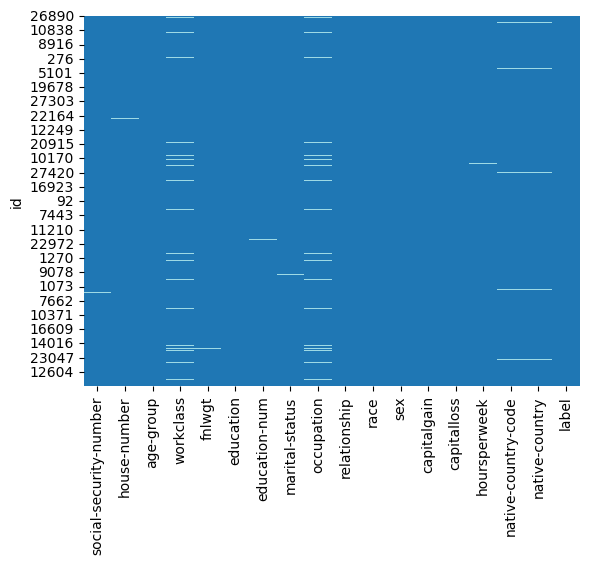

In [9]:
seaborn.heatmap(data_train.isnull(),cbar=False,cmap='tab20')
plt.show()

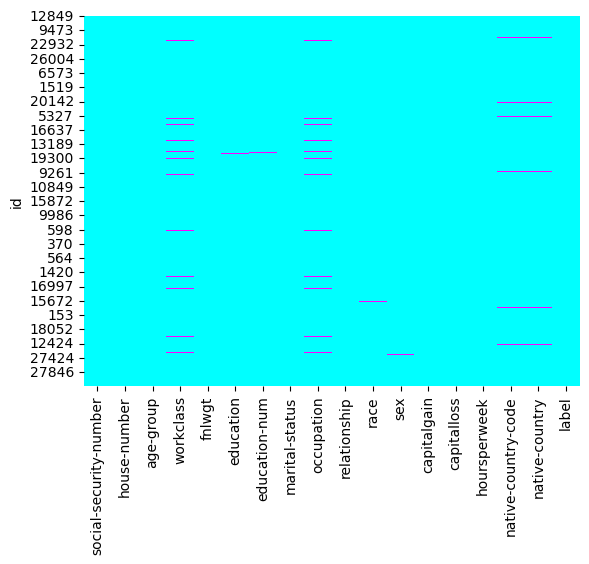

In [10]:
seaborn.heatmap(data_test.isnull(),cbar=False,cmap='cool')
plt.show()

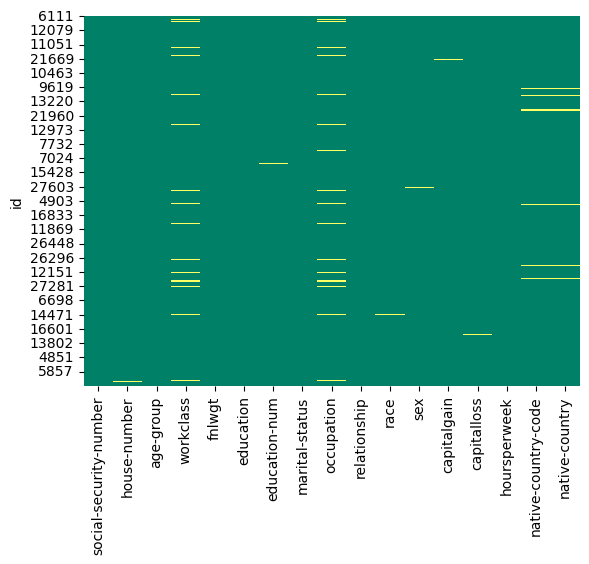

In [11]:
seaborn.heatmap(data_live.isnull(),cbar=False,cmap='summer')
plt.show()

In [12]:
#พอดูจากกราฟ ก็จะได้ข้อสรุปว่าควรจัดการ missing ยังไง แต่ขั้นตอนตอนต่อไปคือ แบ่งเป็น cat,num

In [13]:
data_train.isnull().sum()

social-security-number     12
house-number               20
age-group                   7
workclass                 847
fnlwgt                     17
education                  16
education-num              12
marital-status             21
occupation                845
relationship               15
race                       14
sex                        15
capitalgain                20
capitalloss                14
hoursperweek               19
native-country-code       322
native-country            323
label                       0
dtype: int64

In [14]:
data_test.isnull().sum()

social-security-number      2
house-number                7
age-group                   6
workclass                 210
fnlwgt                      6
education                   4
education-num               2
marital-status              2
occupation                209
relationship                6
race                        8
sex                         7
capitalgain                 3
capitalloss                 7
hoursperweek                2
native-country-code        77
native-country             75
label                       0
dtype: int64

In [15]:
data_live.isnull().sum()

social-security-number      2
house-number                9
age-group                  13
workclass                 345
fnlwgt                      4
education                   7
education-num               8
marital-status              9
occupation                347
relationship               13
race                        7
sex                         7
capitalgain                 8
capitalloss                10
hoursperweek               13
native-country-code       122
native-country            123
dtype: int64

In [16]:
data_train['label'].value_counts()

label
0.0    9719
1.0    7001
Name: count, dtype: int64

In [17]:
data_test['label'].value_counts()

label
0.0    2416
1.0    1764
Name: count, dtype: int64

In [18]:
from sklearn.impute import SimpleImputer

In [19]:
categorical_features_train = data_train.select_dtypes(include=['object', 'category']).columns
categorical_features_train

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country-code', 'native-country'],
      dtype='object')

In [20]:
categorical_features_test = data_test.select_dtypes(include=['object', 'category']).columns
categorical_features_test

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country-code', 'native-country'],
      dtype='object')

In [21]:
categorical_features_live = data_live.select_dtypes(include=['object', 'category']).columns
categorical_features_live

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country-code', 'native-country'],
      dtype='object')

Handling of Missing values for Categorical features

In [22]:
categorical_features_data_train = data_train[categorical_features_train]
categorical_features_data_train

workclass     education      marital-status         occupation  \
id                                                                             
26890         state-gov     doctorate            divorced     prof-specialty   
933             private       masters            divorced     prof-specialty   
25596           private  some-college       never-married       tech-support   
12949           private     bachelors            divorced    exec-managerial   
6681            private       hs-grad  married-civ-spouse  machine-op-inspct   
...                 ...           ...                 ...                ...   
8695            private  some-college       never-married     prof-specialty   
2192          local-gov  some-college  married-civ-spouse   transport-moving   
8250            private       hs-grad       never-married      other-service   
18511           private       masters  married-civ-spouse       tech-support   
16074  self-emp-not-inc          12th  married-civ-spouse    exec-managerial   

         relationship                race     sex native-country-code  \
id                                                                      
26890       own-child               white    male                 USA   
933         unmarried               white    male                 USA   
25596       unmarried               white  female                 USA   
12949   not-in-family               white    male                 USA   
6681          husband               white    male                 USA   
...               ...                 ...     ...                 ...   
8695    not-in-family               white    male                 USA   
2192          husband               white    male                 USA   
8250   other-relative               black    male                 USA   
18511         husband               white    male                 USA   
16074         husband  asian-pac-islander    male                 VNM   

      native-country  
id                    
26890  united-states  
933    united-states  
25596  united-states  
12949  united-states  
6681   united-states  
...              ...  
8695   united-states  
2192   united-states  
8250   united-states  
18511  united-states  
16074        vietnam  

[16720 rows x 9 columns]

In [23]:
categorical_features_data_test = data_test[categorical_features_test]
categorical_features_data_test

workclass     education      marital-status         occupation  \
id                                                                     
12849   private     bachelors       never-married       tech-support   
1460    private     preschool       never-married    farming-fishing   
13594   private       hs-grad            divorced  machine-op-inspct   
14400   private       hs-grad            divorced  machine-op-inspct   
14333   private       hs-grad  married-civ-spouse       craft-repair   
...         ...           ...                 ...                ...   
21121   private       hs-grad  married-civ-spouse       craft-repair   
12348   private     bachelors            divorced    exec-managerial   
22298   private     bachelors  married-civ-spouse    exec-managerial   
15636   private  some-college            divorced    exec-managerial   
5497    private  some-college       never-married    exec-managerial   

        relationship                race     sex native-country-code  \
id                                                                     
12849  not-in-family               white  female                 USA   
1460   not-in-family               white    male                 MEX   
13594      unmarried               black  female                 USA   
14400  not-in-family  amer-indian-eskimo  female                 USA   
14333        husband               white    male                 USA   
...              ...                 ...     ...                 ...   
21121        husband               white    male                 USA   
12348  not-in-family               white  female                 USA   
22298        husband               black    male                 USA   
15636  not-in-family               white    male                 USA   
5497       own-child                 NaN    male                 USA   

      native-country  
id                    
12849  united-states  
1460          mexico  
13594  united-states  
14400  united-states  
14333  united-states  
...              ...  
21121  united-states  
12348  united-states  
22298  united-states  
15636  united-states  
5497   united-states  

[4180 rows x 9 columns]

In [24]:
categorical_features_data_live = data_live[categorical_features_live]
categorical_features_data_live

workclass     education      marital-status       occupation  \
id                                                                    
6111     private          11th  married-civ-spouse  protective-serv   
11214    private       hs-grad       never-married            sales   
5554     private       hs-grad  married-civ-spouse  exec-managerial   
25131  local-gov       masters  married-civ-spouse   prof-specialty   
14324    private       hs-grad  married-civ-spouse     craft-repair   
...          ...           ...                 ...              ...   
25998    private     bachelors  married-civ-spouse  exec-managerial   
8375     private       hs-grad  married-civ-spouse  farming-fishing   
13888    private          11th            divorced    other-service   
4159     private       masters  married-civ-spouse   prof-specialty   
9658         NaN  some-college       never-married              NaN   

        relationship                race     sex native-country-code  \
id                                                                     
6111         husband               white    male                 USA   
11214      unmarried               white  female                 MEX   
5554         husband               white    male                 USA   
25131        husband               white    male                 USA   
14324        husband               white    male                 USA   
...              ...                 ...     ...                 ...   
25998        husband               white    male                 USA   
8375         husband               white    male                 USA   
13888      unmarried               white  female                 USA   
4159         husband  asian-pac-islander    male                 USA   
9658   not-in-family               white  female                 USA   

      native-country  
id                    
6111   united-states  
11214         mexico  
5554   united-states  
25131  united-states  
14324  united-states  
...              ...  
25998  united-states  
8375   united-states  
13888  united-states  
4159   united-states  
9658   united-states  

[6967 rows x 9 columns]

In [25]:
categorical_impute= SimpleImputer(strategy='most_frequent')
categorical_impute

SimpleImputer(strategy='most_frequent')

In [26]:
categorical_impute.fit(categorical_features_data_train)

SimpleImputer(strategy='most_frequent')

In [27]:
categorical_features_data_train = pd.DataFrame(
    data = categorical_impute.transform(categorical_features_data_train),
    columns = categorical_impute.get_feature_names_out(),
    index = categorical_features_data_train.index
)
categorical_features_data_train

workclass     education      marital-status         occupation  \
id                                                                             
26890         state-gov     doctorate            divorced     prof-specialty   
933             private       masters            divorced     prof-specialty   
25596           private  some-college       never-married       tech-support   
12949           private     bachelors            divorced    exec-managerial   
6681            private       hs-grad  married-civ-spouse  machine-op-inspct   
...                 ...           ...                 ...                ...   
8695            private  some-college       never-married     prof-specialty   
2192          local-gov  some-college  married-civ-spouse   transport-moving   
8250            private       hs-grad       never-married      other-service   
18511           private       masters  married-civ-spouse       tech-support   
16074  self-emp-not-inc          12th  married-civ-spouse    exec-managerial   

         relationship                race     sex native-country-code  \
id                                                                      
26890       own-child               white    male                 USA   
933         unmarried               white    male                 USA   
25596       unmarried               white  female                 USA   
12949   not-in-family               white    male                 USA   
6681          husband               white    male                 USA   
...               ...                 ...     ...                 ...   
8695    not-in-family               white    male                 USA   
2192          husband               white    male                 USA   
8250   other-relative               black    male                 USA   
18511         husband               white    male                 USA   
16074         husband  asian-pac-islander    male                 VNM   

      native-country  
id                    
26890  united-states  
933    united-states  
25596  united-states  
12949  united-states  
6681   united-states  
...              ...  
8695   united-states  
2192   united-states  
8250   united-states  
18511  united-states  
16074        vietnam  

[16720 rows x 9 columns]

In [28]:
categorical_features_data_test = pd.DataFrame(
    data = categorical_impute.transform(categorical_features_data_test),
    columns = categorical_impute.get_feature_names_out(),
    index = categorical_features_data_test.index
)
categorical_features_data_test

workclass     education      marital-status         occupation  \
id                                                                     
12849   private     bachelors       never-married       tech-support   
1460    private     preschool       never-married    farming-fishing   
13594   private       hs-grad            divorced  machine-op-inspct   
14400   private       hs-grad            divorced  machine-op-inspct   
14333   private       hs-grad  married-civ-spouse       craft-repair   
...         ...           ...                 ...                ...   
21121   private       hs-grad  married-civ-spouse       craft-repair   
12348   private     bachelors            divorced    exec-managerial   
22298   private     bachelors  married-civ-spouse    exec-managerial   
15636   private  some-college            divorced    exec-managerial   
5497    private  some-college       never-married    exec-managerial   

        relationship                race     sex native-country-code  \
id                                                                     
12849  not-in-family               white  female                 USA   
1460   not-in-family               white    male                 MEX   
13594      unmarried               black  female                 USA   
14400  not-in-family  amer-indian-eskimo  female                 USA   
14333        husband               white    male                 USA   
...              ...                 ...     ...                 ...   
21121        husband               white    male                 USA   
12348  not-in-family               white  female                 USA   
22298        husband               black    male                 USA   
15636  not-in-family               white    male                 USA   
5497       own-child               white    male                 USA   

      native-country  
id                    
12849  united-states  
1460          mexico  
13594  united-states  
14400  united-states  
14333  united-states  
...              ...  
21121  united-states  
12348  united-states  
22298  united-states  
15636  united-states  
5497   united-states  

[4180 rows x 9 columns]

In [29]:
categorical_features_data_live = pd.DataFrame(
    data = categorical_impute.transform(categorical_features_data_live),
    columns = categorical_impute.get_feature_names_out(),
    index = categorical_features_data_live.index
)
categorical_features_data_live

workclass     education      marital-status       occupation  \
id                                                                    
6111     private          11th  married-civ-spouse  protective-serv   
11214    private       hs-grad       never-married            sales   
5554     private       hs-grad  married-civ-spouse  exec-managerial   
25131  local-gov       masters  married-civ-spouse   prof-specialty   
14324    private       hs-grad  married-civ-spouse     craft-repair   
...          ...           ...                 ...              ...   
25998    private     bachelors  married-civ-spouse  exec-managerial   
8375     private       hs-grad  married-civ-spouse  farming-fishing   
13888    private          11th            divorced    other-service   
4159     private       masters  married-civ-spouse   prof-specialty   
9658     private  some-college       never-married  exec-managerial   

        relationship                race     sex native-country-code  \
id                                                                     
6111         husband               white    male                 USA   
11214      unmarried               white  female                 MEX   
5554         husband               white    male                 USA   
25131        husband               white    male                 USA   
14324        husband               white    male                 USA   
...              ...                 ...     ...                 ...   
25998        husband               white    male                 USA   
8375         husband               white    male                 USA   
13888      unmarried               white  female                 USA   
4159         husband  asian-pac-islander    male                 USA   
9658   not-in-family               white  female                 USA   

      native-country  
id                    
6111   united-states  
11214         mexico  
5554   united-states  
25131  united-states  
14324  united-states  
...              ...  
25998  united-states  
8375   united-states  
13888  united-states  
4159   united-states  
9658   united-states  

[6967 rows x 9 columns]

In [30]:
categorical_features_data_train.isnull().sum()

workclass              0
education              0
marital-status         0
occupation             0
relationship           0
race                   0
sex                    0
native-country-code    0
native-country         0
dtype: int64

In [31]:
categorical_features_data_test.isnull().sum()

workclass              0
education              0
marital-status         0
occupation             0
relationship           0
race                   0
sex                    0
native-country-code    0
native-country         0
dtype: int64

In [32]:
categorical_features_data_live.isnull().sum()

workclass              0
education              0
marital-status         0
occupation             0
relationship           0
race                   0
sex                    0
native-country-code    0
native-country         0
dtype: int64

Handling of Missing values for Numerical features

In [33]:
numerical_features = [
    'age-group', 
    'education-num', 
    'capitalgain', 
    'capitalloss', 
    'hoursperweek',
]

In [34]:
numerical_features_data_train = data_train[numerical_features]
numerical_features_data_train

age-group  education-num  capitalgain  capitalloss  hoursperweek
id                                                                     
26890        3.0           16.0          0.0          0.0           3.0
933          3.0           14.0          4.0          0.0           3.0
25596        2.0           10.0          0.0          0.0           2.0
12949        2.0           13.0          0.0          0.0           3.0
6681         1.0            9.0          0.0          0.0           2.0
...          ...            ...          ...          ...           ...
8695         0.0           10.0          0.0          0.0           2.0
2192         2.0           10.0          2.0          0.0           2.0
8250         0.0            9.0          0.0          0.0           2.0
18511        2.0           14.0          0.0          0.0           0.0
16074        2.0            8.0          0.0          0.0           3.0

[16720 rows x 5 columns]

In [35]:
numerical_features_data_test = data_test[numerical_features]
numerical_features_data_test

age-group  education-num  capitalgain  capitalloss  hoursperweek
id                                                                     
12849        1.0           13.0          2.0          0.0           2.0
1460         0.0            1.0          0.0          0.0           3.0
13594        2.0            9.0          0.0          0.0           2.0
14400        3.0            9.0          NaN          0.0           2.0
14333        2.0            9.0          0.0          0.0           3.0
...          ...            ...          ...          ...           ...
21121        3.0            9.0          0.0          0.0           2.0
12348        2.0           13.0          4.0          0.0           2.0
22298        3.0           13.0          0.0          0.0           2.0
15636        1.0           10.0          3.0          0.0           3.0
5497         0.0           10.0          0.0          0.0           2.0

[4180 rows x 5 columns]

In [36]:
numerical_features_data_live = data_live[numerical_features]
numerical_features_data_live

age-group  education-num  capitalgain  capitalloss  hoursperweek
id                                                                     
6111         0.0            7.0          0.0          0.0           2.0
11214        1.0            9.0          0.0          0.0           1.0
5554         4.0            9.0          0.0          0.0           3.0
25131        2.0           14.0          0.0          0.0           2.0
14324        3.0            9.0          0.0          0.0           2.0
...          ...            ...          ...          ...           ...
25998        4.0           13.0          0.0          0.0           3.0
8375         4.0            9.0          0.0          0.0           4.0
13888        1.0            7.0          0.0          0.0           1.0
4159         1.0           14.0          0.0          0.0           2.0
9658         0.0           10.0          0.0          0.0           2.0

[6967 rows x 5 columns]

In [37]:
# #data_train.drop(['social-security-number'], axis = 1)
# data_train.drop(['house-number'], axis = 1)
# data_train.drop(['fnlwgt'], axis = 1)

In [38]:
numerical_imputer = sklearn.impute.SimpleImputer(strategy='mean')
numerical_imputer

SimpleImputer()

In [39]:
numerical_imputer.fit(numerical_features_data_train)

SimpleImputer()

In [40]:
numerical_features_data_train = pd.DataFrame(
data = numerical_imputer.transform(numerical_features_data_train),
columns = numerical_imputer.get_feature_names_out(),
index = numerical_features_data_train.index
)
numerical_features_data_train

age-group  education-num  capitalgain  capitalloss  hoursperweek
id                                                                     
26890        3.0           16.0          0.0          0.0           3.0
933          3.0           14.0          4.0          0.0           3.0
25596        2.0           10.0          0.0          0.0           2.0
12949        2.0           13.0          0.0          0.0           3.0
6681         1.0            9.0          0.0          0.0           2.0
...          ...            ...          ...          ...           ...
8695         0.0           10.0          0.0          0.0           2.0
2192         2.0           10.0          2.0          0.0           2.0
8250         0.0            9.0          0.0          0.0           2.0
18511        2.0           14.0          0.0          0.0           0.0
16074        2.0            8.0          0.0          0.0           3.0

[16720 rows x 5 columns]

In [41]:
numerical_features_data_test = pd.DataFrame(
data = numerical_imputer.transform(numerical_features_data_test),
columns = numerical_imputer.get_feature_names_out(),
index = numerical_features_data_test.index
)

numerical_features_data_test

age-group  education-num  capitalgain  capitalloss  hoursperweek
id                                                                     
12849        1.0           13.0     2.000000          0.0           2.0
1460         0.0            1.0     0.000000          0.0           3.0
13594        2.0            9.0     0.000000          0.0           2.0
14400        3.0            9.0     0.307246          0.0           2.0
14333        2.0            9.0     0.000000          0.0           3.0
...          ...            ...          ...          ...           ...
21121        3.0            9.0     0.000000          0.0           2.0
12348        2.0           13.0     4.000000          0.0           2.0
22298        3.0           13.0     0.000000          0.0           2.0
15636        1.0           10.0     3.000000          0.0           3.0
5497         0.0           10.0     0.000000          0.0           2.0

[4180 rows x 5 columns]

In [42]:
numerical_features_data_live = pd.DataFrame(
data = numerical_imputer.transform(numerical_features_data_live),
columns = numerical_imputer.get_feature_names_out(),
index = numerical_features_data_live.index
)
numerical_features_data_live

age-group  education-num  capitalgain  capitalloss  hoursperweek
id                                                                     
6111         0.0            7.0          0.0          0.0           2.0
11214        1.0            9.0          0.0          0.0           1.0
5554         4.0            9.0          0.0          0.0           3.0
25131        2.0           14.0          0.0          0.0           2.0
14324        3.0            9.0          0.0          0.0           2.0
...          ...            ...          ...          ...           ...
25998        4.0           13.0          0.0          0.0           3.0
8375         4.0            9.0          0.0          0.0           4.0
13888        1.0            7.0          0.0          0.0           1.0
4159         1.0           14.0          0.0          0.0           2.0
9658         0.0           10.0          0.0          0.0           2.0

[6967 rows x 5 columns]

In [43]:
numerical_features_data_train.isna().sum(axis='index')

age-group        0
education-num    0
capitalgain      0
capitalloss      0
hoursperweek     0
dtype: int64

In [44]:
numerical_features_data_test.isna().sum(axis='index')

age-group        0
education-num    0
capitalgain      0
capitalloss      0
hoursperweek     0
dtype: int64

In [45]:
numerical_features_data_live.isna().sum(axis='index')

age-group        0
education-num    0
capitalgain      0
capitalloss      0
hoursperweek     0
dtype: int64

In [46]:
data_train = (
    categorical_features_data_train
    .join(numerical_features_data_train)
    .join(data_train['label'])
    
)
data_train

workclass     education      marital-status         occupation  \
id                                                                             
26890         state-gov     doctorate            divorced     prof-specialty   
933             private       masters            divorced     prof-specialty   
25596           private  some-college       never-married       tech-support   
12949           private     bachelors            divorced    exec-managerial   
6681            private       hs-grad  married-civ-spouse  machine-op-inspct   
...                 ...           ...                 ...                ...   
8695            private  some-college       never-married     prof-specialty   
2192          local-gov  some-college  married-civ-spouse   transport-moving   
8250            private       hs-grad       never-married      other-service   
18511           private       masters  married-civ-spouse       tech-support   
16074  self-emp-not-inc          12th  married-civ-spouse    exec-managerial   

         relationship                race     sex native-country-code  \
id                                                                      
26890       own-child               white    male                 USA   
933         unmarried               white    male                 USA   
25596       unmarried               white  female                 USA   
12949   not-in-family               white    male                 USA   
6681          husband               white    male                 USA   
...               ...                 ...     ...                 ...   
8695    not-in-family               white    male                 USA   
2192          husband               white    male                 USA   
8250   other-relative               black    male                 USA   
18511         husband               white    male                 USA   
16074         husband  asian-pac-islander    male                 VNM   

      native-country  age-group  education-num  capitalgain  capitalloss  \
id                                                                         
26890  united-states        3.0           16.0          0.0          0.0   
933    united-states        3.0           14.0          4.0          0.0   
25596  united-states        2.0           10.0          0.0          0.0   
12949  united-states        2.0           13.0          0.0          0.0   
6681   united-states        1.0            9.0          0.0          0.0   
...              ...        ...            ...          ...          ...   
8695   united-states        0.0           10.0          0.0          0.0   
2192   united-states        2.0           10.0          2.0          0.0   
8250   united-states        0.0            9.0          0.0          0.0   
18511  united-states        2.0           14.0          0.0          0.0   
16074        vietnam        2.0            8.0          0.0          0.0   

       hoursperweek  label  
id                          
26890           3.0    1.0  
933             3.0    1.0  
25596           2.0    0.0  
12949           3.0    1.0  
6681            2.0    0.0  
...             ...    ...  
8695            2.0    0.0  
2192            2.0    0.0  
8250            2.0    0.0  
18511           0.0    1.0  
16074           3.0    0.0  

[16720 rows x 15 columns]

In [47]:
data_test = (
    categorical_features_data_test
    .join(numerical_features_data_test)
    .join(data_test['label'])
    
)
data_test

workclass     education      marital-status         occupation  \
id                                                                     
12849   private     bachelors       never-married       tech-support   
1460    private     preschool       never-married    farming-fishing   
13594   private       hs-grad            divorced  machine-op-inspct   
14400   private       hs-grad            divorced  machine-op-inspct   
14333   private       hs-grad  married-civ-spouse       craft-repair   
...         ...           ...                 ...                ...   
21121   private       hs-grad  married-civ-spouse       craft-repair   
12348   private     bachelors            divorced    exec-managerial   
22298   private     bachelors  married-civ-spouse    exec-managerial   
15636   private  some-college            divorced    exec-managerial   
5497    private  some-college       never-married    exec-managerial   

        relationship                race     sex native-country-code  \
id                                                                     
12849  not-in-family               white  female                 USA   
1460   not-in-family               white    male                 MEX   
13594      unmarried               black  female                 USA   
14400  not-in-family  amer-indian-eskimo  female                 USA   
14333        husband               white    male                 USA   
...              ...                 ...     ...                 ...   
21121        husband               white    male                 USA   
12348  not-in-family               white  female                 USA   
22298        husband               black    male                 USA   
15636  not-in-family               white    male                 USA   
5497       own-child               white    male                 USA   

      native-country  age-group  education-num  capitalgain  capitalloss  \
id                                                                         
12849  united-states        1.0           13.0     2.000000          0.0   
1460          mexico        0.0            1.0     0.000000          0.0   
13594  united-states        2.0            9.0     0.000000          0.0   
14400  united-states        3.0            9.0     0.307246          0.0   
14333  united-states        2.0            9.0     0.000000          0.0   
...              ...        ...            ...          ...          ...   
21121  united-states        3.0            9.0     0.000000          0.0   
12348  united-states        2.0           13.0     4.000000          0.0   
22298  united-states        3.0           13.0     0.000000          0.0   
15636  united-states        1.0           10.0     3.000000          0.0   
5497   united-states        0.0           10.0     0.000000          0.0   

       hoursperweek  label  
id                          
12849           2.0    1.0  
1460            3.0    0.0  
13594           2.0    0.0  
14400           2.0    0.0  
14333           3.0    1.0  
...             ...    ...  
21121           2.0    1.0  
12348           2.0    1.0  
22298           2.0    0.0  
15636           3.0    1.0  
5497            2.0    0.0  

[4180 rows x 15 columns]

In [48]:
data_live= (
    categorical_features_data_live
    .join(numerical_features_data_live)
)
data_live

workclass     education      marital-status       occupation  \
id                                                                    
6111     private          11th  married-civ-spouse  protective-serv   
11214    private       hs-grad       never-married            sales   
5554     private       hs-grad  married-civ-spouse  exec-managerial   
25131  local-gov       masters  married-civ-spouse   prof-specialty   
14324    private       hs-grad  married-civ-spouse     craft-repair   
...          ...           ...                 ...              ...   
25998    private     bachelors  married-civ-spouse  exec-managerial   
8375     private       hs-grad  married-civ-spouse  farming-fishing   
13888    private          11th            divorced    other-service   
4159     private       masters  married-civ-spouse   prof-specialty   
9658     private  some-college       never-married  exec-managerial   

        relationship                race     sex native-country-code  \
id                                                                     
6111         husband               white    male                 USA   
11214      unmarried               white  female                 MEX   
5554         husband               white    male                 USA   
25131        husband               white    male                 USA   
14324        husband               white    male                 USA   
...              ...                 ...     ...                 ...   
25998        husband               white    male                 USA   
8375         husband               white    male                 USA   
13888      unmarried               white  female                 USA   
4159         husband  asian-pac-islander    male                 USA   
9658   not-in-family               white  female                 USA   

      native-country  age-group  education-num  capitalgain  capitalloss  \
id                                                                         
6111   united-states        0.0            7.0          0.0          0.0   
11214         mexico        1.0            9.0          0.0          0.0   
5554   united-states        4.0            9.0          0.0          0.0   
25131  united-states        2.0           14.0          0.0          0.0   
14324  united-states        3.0            9.0          0.0          0.0   
...              ...        ...            ...          ...          ...   
25998  united-states        4.0           13.0          0.0          0.0   
8375   united-states        4.0            9.0          0.0          0.0   
13888  united-states        1.0            7.0          0.0          0.0   
4159   united-states        1.0           14.0          0.0          0.0   
9658   united-states        0.0           10.0          0.0          0.0   

       hoursperweek  
id                   
6111            2.0  
11214           1.0  
5554            3.0  
25131           2.0  
14324           2.0  
...             ...  
25998           3.0  
8375            4.0  
13888           1.0  
4159            2.0  
9658            2.0  

[6967 rows x 14 columns]

Handling of Missing values for Ordinal features

In [49]:
ordinal = data_train.select_dtypes(include=['object','category']).columns
ordinal

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country-code', 'native-country'],
      dtype='object')

In [50]:
ordinal_features = ['education']

for feature in ordinal_features:
    possible_value = data_train[feature].unique()
    print(f"{feature:20s} {possible_value.size:2d} {possible_value}")

education            16 ['doctorate' 'masters' 'some-college' 'bachelors' 'hs-grad' 'assoc-voc'
 '12th' 'prof-school' '7th-8th' '11th' '10th' 'assoc-acdm' '9th' '5th-6th'
 '1st-4th' 'preschool']


In [51]:
ordinal_mapping = [
    ['doctorate',
     'masters',
     'some-college',
     'bachelors',
     'hs-grad',
     'assoc-voc',
     '12th',
     'prof-school',
     '7th-8th',
     '11th',
     '10th',
     'assoc-acdm',
     '9th',
     '5th-6th',
     '1st-4th',
     'preschool',
    ]
]

In [52]:
ordinal_encoder = sklearn.preprocessing.OrdinalEncoder(categories=ordinal_mapping)
ordinal_encoder

OrdinalEncoder(categories=[['doctorate', 'masters', 'some-college', 'bachelors',
                            'hs-grad', 'assoc-voc', '12th', 'prof-school',
                            '7th-8th', '11th', '10th', 'assoc-acdm', '9th',
                            '5th-6th', '1st-4th', 'preschool']])

In [53]:
ordinal_encoder.fit(
    X = data_train[ordinal_features]
)

OrdinalEncoder(categories=[['doctorate', 'masters', 'some-college', 'bachelors',
                            'hs-grad', 'assoc-voc', '12th', 'prof-school',
                            '7th-8th', '11th', '10th', 'assoc-acdm', '9th',
                            '5th-6th', '1st-4th', 'preschool']])

In [54]:
ordinal_features_data_train = pd.DataFrame(
data = ordinal_encoder.transform(data_train[ordinal_features]),
columns = ordinal_encoder.get_feature_names_out(),
index = data_train.index
)
ordinal_features_data_train

education
id              
26890        0.0
933          1.0
25596        2.0
12949        3.0
6681         4.0
...          ...
8695         2.0
2192         2.0
8250         4.0
18511        1.0
16074        6.0

[16720 rows x 1 columns]

In [55]:
ordinal_features_data_test = pd.DataFrame(
data = ordinal_encoder.transform(data_test[ordinal_features]),
columns = ordinal_encoder.get_feature_names_out(),
index = data_test.index
)
ordinal_features_data_test

education
id              
12849        3.0
1460        15.0
13594        4.0
14400        4.0
14333        4.0
...          ...
21121        4.0
12348        3.0
22298        3.0
15636        2.0
5497         2.0

[4180 rows x 1 columns]

In [56]:
ordinal_features_data_live = pd.DataFrame(
data = ordinal_encoder.transform(data_live[ordinal_features]),
columns = ordinal_encoder.get_feature_names_out(),
index = data_live.index
)
ordinal_features_data_live

education
id              
6111         9.0
11214        4.0
5554         4.0
25131        1.0
14324        4.0
...          ...
25998        3.0
8375         4.0
13888        9.0
4159         1.0
9658         2.0

[6967 rows x 1 columns]

Handling of Missing values for Nominal features

In [57]:
nominal_features = [
    'workclass',  
    'marital-status', 
    'occupation',
    'relationship', 
    'race', 
    'sex']

nominal_features
for feature in nominal_features:
    possible_value = data_train[feature].unique()
    print(f"{feature:20s} {possible_value.size:2d} {possible_value}")

workclass             8 ['state-gov' 'private' 'self-emp-inc' 'self-emp-not-inc' 'federal-gov'
 'local-gov' 'without-pay' 'never-worked']
marital-status        7 ['divorced' 'never-married' 'married-civ-spouse' 'separated' 'widowed'
 'married-spouse-absent' 'married-af-spouse']
occupation           14 ['prof-specialty' 'tech-support' 'exec-managerial' 'machine-op-inspct'
 'sales' 'handlers-cleaners' 'craft-repair' 'other-service' 'adm-clerical'
 'transport-moving' 'protective-serv' 'farming-fishing' 'priv-house-serv'
 'armed-forces']
relationship          6 ['own-child' 'unmarried' 'not-in-family' 'husband' 'wife' 'other-relative']
race                  5 ['white' 'black' 'asian-pac-islander' 'other' 'amer-indian-eskimo']
sex                   2 ['male' 'female']


In [58]:
nominal_mapping = [
    # workclass
    ['state-gov', 'private', 'self-emp-inc', 'self-emp-not-inc', 'federal-gov',
     'local-gov', 'without-pay', 'never-worked'],
    # marital-status
    ['divorced', 'never-married', 'married-civ-spouse', 'separated', 'widowed',
     'married-spouse-absent', 'married-af-spouse'],
    # occupation
    ['prof-specialty', 'tech-support', 'exec-managerial', 'machine-op-inspct',
     'sales', 'handlers-cleaners', 'craft-repair', 'other-service', 'adm-clerical',
     'transport-moving', 'protective-serv', 'farming-fishing', 'priv-house-serv',
     'armed-forces'],
    # relationship
    ['own-child', 'unmarried', 'not-in-family', 'husband', 'wife', 'other-relative'],
    # race
    ['white', 'black', 'asian-pac-islander', 'other', 'amer-indian-eskimo'],
    # sex
    ['male', 'female']

]

In [59]:
onehot_encoder = sklearn.preprocessing.OneHotEncoder(categories=nominal_mapping, sparse_output=False)
onehot_encoder

OneHotEncoder(categories=[['state-gov', 'private', 'self-emp-inc',
                           'self-emp-not-inc', 'federal-gov', 'local-gov',
                           'without-pay', 'never-worked'],
                          ['divorced', 'never-married', 'married-civ-spouse',
                           'separated', 'widowed', 'married-spouse-absent',
                           'married-af-spouse'],
                          ['prof-specialty', 'tech-support', 'exec-managerial',
                           'machine-op-inspct', 'sales', 'handlers-cleaners',
                           'craft-repair', 'other-service', 'adm-clerical',
                           'transport-moving', 'protective-serv',
                           'farming-fishing', 'priv-house-serv',
                           'armed-forces'],
                          ['own-child', 'unmarried', 'not-in-family', 'husband',
                           'wife', 'other-relative'],
                          ['white', 'black', 'asian-pac-islander', 'other',
                           'amer-indian-eskimo'],
                          ['male', 'female']],
              sparse_output=False)

In [60]:
onehot_encoder.fit(
    X=data_train[nominal_features]
)

OneHotEncoder(categories=[['state-gov', 'private', 'self-emp-inc',
                           'self-emp-not-inc', 'federal-gov', 'local-gov',
                           'without-pay', 'never-worked'],
                          ['divorced', 'never-married', 'married-civ-spouse',
                           'separated', 'widowed', 'married-spouse-absent',
                           'married-af-spouse'],
                          ['prof-specialty', 'tech-support', 'exec-managerial',
                           'machine-op-inspct', 'sales', 'handlers-cleaners',
                           'craft-repair', 'other-service', 'adm-clerical',
                           'transport-moving', 'protective-serv',
                           'farming-fishing', 'priv-house-serv',
                           'armed-forces'],
                          ['own-child', 'unmarried', 'not-in-family', 'husband',
                           'wife', 'other-relative'],
                          ['white', 'black', 'asian-pac-islander', 'other',
                           'amer-indian-eskimo'],
                          ['male', 'female']],
              sparse_output=False)

In [61]:
onehot_encoder.get_feature_names_out()

array(['workclass_state-gov', 'workclass_private',
       'workclass_self-emp-inc', 'workclass_self-emp-not-inc',
       'workclass_federal-gov', 'workclass_local-gov',
       'workclass_without-pay', 'workclass_never-worked',
       'marital-status_divorced', 'marital-status_never-married',
       'marital-status_married-civ-spouse', 'marital-status_separated',
       'marital-status_widowed', 'marital-status_married-spouse-absent',
       'marital-status_married-af-spouse', 'occupation_prof-specialty',
       'occupation_tech-support', 'occupation_exec-managerial',
       'occupation_machine-op-inspct', 'occupation_sales',
       'occupation_handlers-cleaners', 'occupation_craft-repair',
       'occupation_other-service', 'occupation_adm-clerical',
       'occupation_transport-moving', 'occupation_protective-serv',
       'occupation_farming-fishing', 'occupation_priv-house-serv',
       'occupation_armed-forces', 'relationship_own-child',
       'relationship_unmarried', 'relationsh

In [62]:
nominal_features_data_train = pd.DataFrame(
    data = onehot_encoder.transform(data_train[nominal_features]),
    columns = onehot_encoder.get_feature_names_out(),
    index = data_train.index
)
nominal_features_data_train

workclass_state-gov  workclass_private  workclass_self-emp-inc  \
id                                                                      
26890                  1.0                0.0                     0.0   
933                    0.0                1.0                     0.0   
25596                  0.0                1.0                     0.0   
12949                  0.0                1.0                     0.0   
6681                   0.0                1.0                     0.0   
...                    ...                ...                     ...   
8695                   0.0                1.0                     0.0   
2192                   0.0                0.0                     0.0   
8250                   0.0                1.0                     0.0   
18511                  0.0                1.0                     0.0   
16074                  0.0                0.0                     0.0   

       workclass_self-emp-not-inc  workclass_federal-gov  workclass_local-gov  \
id                                                                              
26890                         0.0                    0.0                  0.0   
933                           0.0                    0.0                  0.0   
25596                         0.0                    0.0                  0.0   
12949                         0.0                    0.0                  0.0   
6681                          0.0                    0.0                  0.0   
...                           ...                    ...                  ...   
8695                          0.0                    0.0                  0.0   
2192                          0.0                    0.0                  1.0   
8250                          0.0                    0.0                  0.0   
18511                         0.0                    0.0                  0.0   
16074                         1.0                    0.0                  0.0   

       workclass_without-pay  workclass_never-worked  marital-status_divorced  \
id                                                                              
26890                    0.0                     0.0                      1.0   
933                      0.0                     0.0                      1.0   
25596                    0.0                     0.0                      0.0   
12949                    0.0                     0.0                      1.0   
6681                     0.0                     0.0                      0.0   
...                      ...                     ...                      ...   
8695                     0.0                     0.0                      0.0   
2192                     0.0                     0.0                      0.0   
8250                     0.0                     0.0                      0.0   
18511                    0.0                     0.0                      0.0   
16074                    0.0                     0.0                      0.0   

       marital-status_never-married  ...  relationship_husband  \
id                                   ...                         
26890                           0.0  ...                   0.0   
933                             0.0  ...                   0.0   
25596                           1.0  ...                   0.0   
12949                           0.0  ...                   0.0   
6681                            0.0  ...                   1.0   
...                             ...  ...                   ...   
8695                            1.0  ...                   0.0   
2192                            0.0  ...                   1.0   
8250                            1.0  ...                   0.0   
18511                           0.0  ...                   1.0   
16074                           0.0  ...                   1.0   

       relationship_wife  relationship_other-relative  race_white  race_black  \
id       

In [63]:
nominal_features_data_test = pd.DataFrame(
    data = onehot_encoder.transform(data_test[nominal_features]),
    columns = onehot_encoder.get_feature_names_out(),
    index = data_test.index
)
nominal_features_data_test

workclass_state-gov  workclass_private  workclass_self-emp-inc  \
id                                                                      
12849                  0.0                1.0                     0.0   
1460                   0.0                1.0                     0.0   
13594                  0.0                1.0                     0.0   
14400                  0.0                1.0                     0.0   
14333                  0.0                1.0                     0.0   
...                    ...                ...                     ...   
21121                  0.0                1.0                     0.0   
12348                  0.0                1.0                     0.0   
22298                  0.0                1.0                     0.0   
15636                  0.0                1.0                     0.0   
5497                   0.0                1.0                     0.0   

       workclass_self-emp-not-inc  workclass_federal-gov  workclass_local-gov  \
id                                                                              
12849                         0.0                    0.0                  0.0   
1460                          0.0                    0.0                  0.0   
13594                         0.0                    0.0                  0.0   
14400                         0.0                    0.0                  0.0   
14333                         0.0                    0.0                  0.0   
...                           ...                    ...                  ...   
21121                         0.0                    0.0                  0.0   
12348                         0.0                    0.0                  0.0   
22298                         0.0                    0.0                  0.0   
15636                         0.0                    0.0                  0.0   
5497                          0.0                    0.0                  0.0   

       workclass_without-pay  workclass_never-worked  marital-status_divorced  \
id                                                                              
12849                    0.0                     0.0                      0.0   
1460                     0.0                     0.0                      0.0   
13594                    0.0                     0.0                      1.0   
14400                    0.0                     0.0                      1.0   
14333                    0.0                     0.0                      0.0   
...                      ...                     ...                      ...   
21121                    0.0                     0.0                      0.0   
12348                    0.0                     0.0                      1.0   
22298                    0.0                     0.0                      0.0   
15636                    0.0                     0.0                      1.0   
5497                     0.0                     0.0                      0.0   

       marital-status_never-married  ...  relationship_husband  \
id                                   ...                         
12849                           1.0  ...                   0.0   
1460                            1.0  ...                   0.0   
13594                           0.0  ...                   0.0   
14400                           0.0  ...                   0.0   
14333                           0.0  ...                   1.0   
...                             ...  ...                   ...   
21121                           0.0  ...                   1.0   
12348                           0.0  ...                   0.0   
22298                           0.0  ...                   1.0   
15636                           0.0  ...                   0.0   
5497                            1.0  ...                   0.0   

       relationship_wife  relationship_other-relative  race_white  race_black  \
id       

In [64]:
nominal_features_data_live = pd.DataFrame(
    data = onehot_encoder.transform(data_live[nominal_features]),
    columns = onehot_encoder.get_feature_names_out(),
    index = data_live.index
)
nominal_features_data_live

workclass_state-gov  workclass_private  workclass_self-emp-inc  \
id                                                                      
6111                   0.0                1.0                     0.0   
11214                  0.0                1.0                     0.0   
5554                   0.0                1.0                     0.0   
25131                  0.0                0.0                     0.0   
14324                  0.0                1.0                     0.0   
...                    ...                ...                     ...   
25998                  0.0                1.0                     0.0   
8375                   0.0                1.0                     0.0   
13888                  0.0                1.0                     0.0   
4159                   0.0                1.0                     0.0   
9658                   0.0                1.0                     0.0   

       workclass_self-emp-not-inc  workclass_federal-gov  workclass_local-gov  \
id                                                                              
6111                          0.0                    0.0                  0.0   
11214                         0.0                    0.0                  0.0   
5554                          0.0                    0.0                  0.0   
25131                         0.0                    0.0                  1.0   
14324                         0.0                    0.0                  0.0   
...                           ...                    ...                  ...   
25998                         0.0                    0.0                  0.0   
8375                          0.0                    0.0                  0.0   
13888                         0.0                    0.0                  0.0   
4159                          0.0                    0.0                  0.0   
9658                          0.0                    0.0                  0.0   

       workclass_without-pay  workclass_never-worked  marital-status_divorced  \
id                                                                              
6111                     0.0                     0.0                      0.0   
11214                    0.0                     0.0                      0.0   
5554                     0.0                     0.0                      0.0   
25131                    0.0                     0.0                      0.0   
14324                    0.0                     0.0                      0.0   
...                      ...                     ...                      ...   
25998                    0.0                     0.0                      0.0   
8375                     0.0                     0.0                      0.0   
13888                    0.0                     0.0                      1.0   
4159                     0.0                     0.0                      0.0   
9658                     0.0                     0.0                      0.0   

       marital-status_never-married  ...  relationship_husband  \
id                                   ...                         
6111                            0.0  ...                   1.0   
11214                           1.0  ...                   0.0   
5554                            0.0  ...                   1.0   
25131                           0.0  ...                   1.0   
14324                           0.0  ...                   1.0   
...                             ...  ...                   ...   
25998                           0.0  ...                   1.0   
8375                            0.0  ...                   1.0   
13888                           0.0  ...                   0.0   
4159                            0.0  ...                   1.0   
9658                            1.0  ...                   0.0   

       relationship_wife  relationship_other-relative  race_white  race_black  \
id       

For numerical features
• Use a subset of numerical features
• Apply sklearn.preprocessing.StandardScaler to create a standard scaler, then fit using
the training data
• Create a new pandas.DataFrame of only numerically encoded features for both training and
test data

In [65]:
standard_scaler = sklearn.preprocessing.StandardScaler()
standard_scaler

StandardScaler()

In [66]:
standard_scaler.fit(numerical_features_data_train)

StandardScaler()

In [67]:
numerical_features_data_train = pd.DataFrame(
    data = standard_scaler.transform(numerical_features_data_train),
    columns = standard_scaler.get_feature_names_out(),
    index = numerical_features_data_train.index
)
numerical_features_data_train

age-group  education-num  capitalgain  capitalloss  hoursperweek
id                                                                     
26890   0.866005       2.144410    -0.327581    -0.231881      1.094355
933     0.866005       1.373691     3.937169    -0.231881      1.094355
25596   0.067553      -0.167747    -0.327581    -0.231881     -0.051599
12949   0.067553       0.988332    -0.327581    -0.231881      1.094355
6681   -0.730900      -0.553107    -0.327581    -0.231881     -0.051599
...          ...            ...          ...          ...           ...
8695   -1.529352      -0.167747    -0.327581    -0.231881     -0.051599
2192    0.067553      -0.167747     1.804794    -0.231881     -0.051599
8250   -1.529352      -0.553107    -0.327581    -0.231881     -0.051599
18511   0.067553       1.373691    -0.327581    -0.231881     -2.343509
16074   0.067553      -0.938466    -0.327581    -0.231881      1.094355

[16720 rows x 5 columns]

In [68]:
numerical_features_data_test = pd.DataFrame(
    data = standard_scaler.transform(numerical_features_data_test),
    columns = standard_scaler.get_feature_names_out(),
    index = numerical_features_data_test.index
)
numerical_features_data_test

age-group  education-num   capitalgain  capitalloss  hoursperweek
id                                                                      
12849  -0.730900       0.988332  1.804794e+00    -0.231881     -0.051599
1460   -1.529352      -3.635984 -3.275813e-01    -0.231881      1.094355
13594   0.067553      -0.553107 -3.275813e-01    -0.231881     -0.051599
14400   0.866005      -0.553107  5.918530e-17    -0.231881     -0.051599
14333   0.067553      -0.553107 -3.275813e-01    -0.231881      1.094355
...          ...            ...           ...          ...           ...
21121   0.866005      -0.553107 -3.275813e-01    -0.231881     -0.051599
12348   0.067553       0.988332  3.937169e+00    -0.231881     -0.051599
22298   0.866005       0.988332 -3.275813e-01    -0.231881     -0.051599
15636  -0.730900      -0.167747  2.870981e+00    -0.231881      1.094355
5497   -1.529352      -0.167747 -3.275813e-01    -0.231881     -0.051599

[4180 rows x 5 columns]

In [69]:
numerical_features_data_live = pd.DataFrame(
    data = standard_scaler.transform(numerical_features_data_live),
    columns = standard_scaler.get_feature_names_out(),
    index = numerical_features_data_live.index
)
numerical_features_data_live

age-group  education-num  capitalgain  capitalloss  hoursperweek
id                                                                     
6111   -1.529352      -1.323826    -0.327581    -0.231881     -0.051599
11214  -0.730900      -0.553107    -0.327581    -0.231881     -1.197554
5554    1.664458      -0.553107    -0.327581    -0.231881      1.094355
25131   0.067553       1.373691    -0.327581    -0.231881     -0.051599
14324   0.866005      -0.553107    -0.327581    -0.231881     -0.051599
...          ...            ...          ...          ...           ...
25998   1.664458       0.988332    -0.327581    -0.231881      1.094355
8375    1.664458      -0.553107    -0.327581    -0.231881      2.240310
13888  -0.730900      -1.323826    -0.327581    -0.231881     -1.197554
4159   -0.730900       1.373691    -0.327581    -0.231881     -0.051599
9658   -1.529352      -0.167747    -0.327581    -0.231881     -0.051599

[6967 rows x 5 columns]

In [70]:
data_train = (
    numerical_features_data_train
    .join(ordinal_features_data_train)
    .join(nominal_features_data_train)
    .join(data_train['label'])
)
data_train

age-group  education-num  capitalgain  capitalloss  hoursperweek  \
id                                                                        
26890   0.866005       2.144410    -0.327581    -0.231881      1.094355   
933     0.866005       1.373691     3.937169    -0.231881      1.094355   
25596   0.067553      -0.167747    -0.327581    -0.231881     -0.051599   
12949   0.067553       0.988332    -0.327581    -0.231881      1.094355   
6681   -0.730900      -0.553107    -0.327581    -0.231881     -0.051599   
...          ...            ...          ...          ...           ...   
8695   -1.529352      -0.167747    -0.327581    -0.231881     -0.051599   
2192    0.067553      -0.167747     1.804794    -0.231881     -0.051599   
8250   -1.529352      -0.553107    -0.327581    -0.231881     -0.051599   
18511   0.067553       1.373691    -0.327581    -0.231881     -2.343509   
16074   0.067553      -0.938466    -0.327581    -0.231881      1.094355   

       education  workclass_state-gov  workclass_private  \
id                                                         
26890        0.0                  1.0                0.0   
933          1.0                  0.0                1.0   
25596        2.0                  0.0                1.0   
12949        3.0                  0.0                1.0   
6681         4.0                  0.0                1.0   
...          ...                  ...                ...   
8695         2.0                  0.0                1.0   
2192         2.0                  0.0                0.0   
8250         4.0                  0.0                1.0   
18511        1.0                  0.0                1.0   
16074        6.0                  0.0                0.0   

       workclass_self-emp-inc  workclass_self-emp-not-inc  ...  \
id                                                         ...   
26890                     0.0                         0.0  ...   
933                       0.0                         0.0  ...   
25596                     0.0                         0.0  ...   
12949                     0.0                         0.0  ...   
6681                      0.0                         0.0  ...   
...                       ...                         ...  ...   
8695                      0.0                         0.0  ...   
2192                      0.0                         0.0  ...   
8250                      0.0                         0.0  ...   
18511                     0.0                         0.0  ...   
16074                     0.0                         1.0  ...   

       relationship_wife  relationship_other-relative  race_white  race_black  \
id                                                                              
26890                0.0                          0.0         1.0         0.0   
933                  0.0                          0.0         1.0         0.0   
25596                0.0                          0.0         1.0         0.0   
12949                0.0                          0.0         1.0         0.0   
6681                 0.0                          0.0         1.0         0.0   
...                  ...                          ...         ...         ...   
8695                 0.0                          0.0         1.0         0.0   
2192                 0.0                          0.0         1.0         0.0   
8250                 0.0                          1.0         0.0         1.0   
18511                0.0                          0.0         1.0         0.0   
16074                0.0                          0.0         0.0         0.0   

       race_asian-pac-islander  race_other  race_amer-indian-eskimo  sex_male  \
id                                                                              
26890                      0.0         0.0                      0.0       1.0   
933                        0.0         0.0                      0.0       1.0   
25596        

In [71]:
data_test= (
    numerical_features_data_test
    .join(ordinal_features_data_test)
    .join(nominal_features_data_test)
    .join(data_test['label'])
)
data_test

age-group  education-num   capitalgain  capitalloss  hoursperweek  \
id                                                                         
12849  -0.730900       0.988332  1.804794e+00    -0.231881     -0.051599   
1460   -1.529352      -3.635984 -3.275813e-01    -0.231881      1.094355   
13594   0.067553      -0.553107 -3.275813e-01    -0.231881     -0.051599   
14400   0.866005      -0.553107  5.918530e-17    -0.231881     -0.051599   
14333   0.067553      -0.553107 -3.275813e-01    -0.231881      1.094355   
...          ...            ...           ...          ...           ...   
21121   0.866005      -0.553107 -3.275813e-01    -0.231881     -0.051599   
12348   0.067553       0.988332  3.937169e+00    -0.231881     -0.051599   
22298   0.866005       0.988332 -3.275813e-01    -0.231881     -0.051599   
15636  -0.730900      -0.167747  2.870981e+00    -0.231881      1.094355   
5497   -1.529352      -0.167747 -3.275813e-01    -0.231881     -0.051599   

       education  workclass_state-gov  workclass_private  \
id                                                         
12849        3.0                  0.0                1.0   
1460        15.0                  0.0                1.0   
13594        4.0                  0.0                1.0   
14400        4.0                  0.0                1.0   
14333        4.0                  0.0                1.0   
...          ...                  ...                ...   
21121        4.0                  0.0                1.0   
12348        3.0                  0.0                1.0   
22298        3.0                  0.0                1.0   
15636        2.0                  0.0                1.0   
5497         2.0                  0.0                1.0   

       workclass_self-emp-inc  workclass_self-emp-not-inc  ...  \
id                                                         ...   
12849                     0.0                         0.0  ...   
1460                      0.0                         0.0  ...   
13594                     0.0                         0.0  ...   
14400                     0.0                         0.0  ...   
14333                     0.0                         0.0  ...   
...                       ...                         ...  ...   
21121                     0.0                         0.0  ...   
12348                     0.0                         0.0  ...   
22298                     0.0                         0.0  ...   
15636                     0.0                         0.0  ...   
5497                      0.0                         0.0  ...   

       relationship_wife  relationship_other-relative  race_white  race_black  \
id                                                                              
12849                0.0                          0.0         1.0         0.0   
1460                 0.0                          0.0         1.0         0.0   
13594                0.0                          0.0         0.0         1.0   
14400                0.0                          0.0         0.0         0.0   
14333                0.0                          0.0         1.0         0.0   
...                  ...                          ...         ...         ...   
21121                0.0                          0.0         1.0         0.0   
12348                0.0                          0.0         1.0         0.0   
22298                0.0                          0.0         0.0         1.0   
15636                0.0                          0.0         1.0         0.0   
5497                 0.0                          0.0         1.0         0.0   

       race_asian-pac-islander  race_other  race_amer-indian-eskimo  sex_male  \
id                                                                              
12849                      0.0         0.0                      0.0       0.0   
1460                       0.0         0.0                      0.0       1.0   


In [72]:
data_live = (
    numerical_features_data_live
    .join(ordinal_features_data_live)
    .join(nominal_features_data_live)
)
data_live

age-group  education-num  capitalgain  capitalloss  hoursperweek  \
id                                                                        
6111   -1.529352      -1.323826    -0.327581    -0.231881     -0.051599   
11214  -0.730900      -0.553107    -0.327581    -0.231881     -1.197554   
5554    1.664458      -0.553107    -0.327581    -0.231881      1.094355   
25131   0.067553       1.373691    -0.327581    -0.231881     -0.051599   
14324   0.866005      -0.553107    -0.327581    -0.231881     -0.051599   
...          ...            ...          ...          ...           ...   
25998   1.664458       0.988332    -0.327581    -0.231881      1.094355   
8375    1.664458      -0.553107    -0.327581    -0.231881      2.240310   
13888  -0.730900      -1.323826    -0.327581    -0.231881     -1.197554   
4159   -0.730900       1.373691    -0.327581    -0.231881     -0.051599   
9658   -1.529352      -0.167747    -0.327581    -0.231881     -0.051599   

       education  workclass_state-gov  workclass_private  \
id                                                         
6111         9.0                  0.0                1.0   
11214        4.0                  0.0                1.0   
5554         4.0                  0.0                1.0   
25131        1.0                  0.0                0.0   
14324        4.0                  0.0                1.0   
...          ...                  ...                ...   
25998        3.0                  0.0                1.0   
8375         4.0                  0.0                1.0   
13888        9.0                  0.0                1.0   
4159         1.0                  0.0                1.0   
9658         2.0                  0.0                1.0   

       workclass_self-emp-inc  workclass_self-emp-not-inc  ...  \
id                                                         ...   
6111                      0.0                         0.0  ...   
11214                     0.0                         0.0  ...   
5554                      0.0                         0.0  ...   
25131                     0.0                         0.0  ...   
14324                     0.0                         0.0  ...   
...                       ...                         ...  ...   
25998                     0.0                         0.0  ...   
8375                      0.0                         0.0  ...   
13888                     0.0                         0.0  ...   
4159                      0.0                         0.0  ...   
9658                      0.0                         0.0  ...   

       relationship_husband  relationship_wife  relationship_other-relative  \
id                                                                            
6111                    1.0                0.0                          0.0   
11214                   0.0                0.0                          0.0   
5554                    1.0                0.0                          0.0   
25131                   1.0                0.0                          0.0   
14324                   1.0                0.0                          0.0   
...                     ...                ...                          ...   
25998                   1.0                0.0                          0.0   
8375                    1.0                0.0                          0.0   
13888                   0.0                0.0                          0.0   
4159                    1.0                0.0                          0.0   
9658                    0.0                0.0                          0.0   

       race_white  race_black  race_asian-pac-islander  race_other  \
id                                                                   
6111          1.0         0.0                      0.0         0.0   
11214         1.0         0.0                      0.0         0.0   
5554          1.0         0.0                      0.0         0.0   
25131        

In [73]:
data_train.to_csv('./data/features.train.csv')

In [74]:
data_test.to_csv('./data/features.test.csv')

In [75]:
data_live.to_csv('./data/features.live.csv')